In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Assignment_Dataset.xlsx')

In [3]:
df.head(5)

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440


In [4]:
# Convert the date column to a datetime object
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
# Creating a column with values corresponding to the 30 day rolling average
df['30 day moving avg' ] = df['PR'].rolling(window=30).mean()

In [9]:
df.head(5)

,Date,GHI,PR,30 day moving avg
0,2019-07-01,3.256608,69.575676,NaN
1,2019-07-02,3.976767,79.314411,NaN
2,2019-07-03,2.811867,61.020006,NaN
3,2019-07-04,3.658408,83.262576,NaN
4,2019-07-05,5.590683,82.124440,NaN


Text(0, 0.5, 'Performance Ratio [%]')

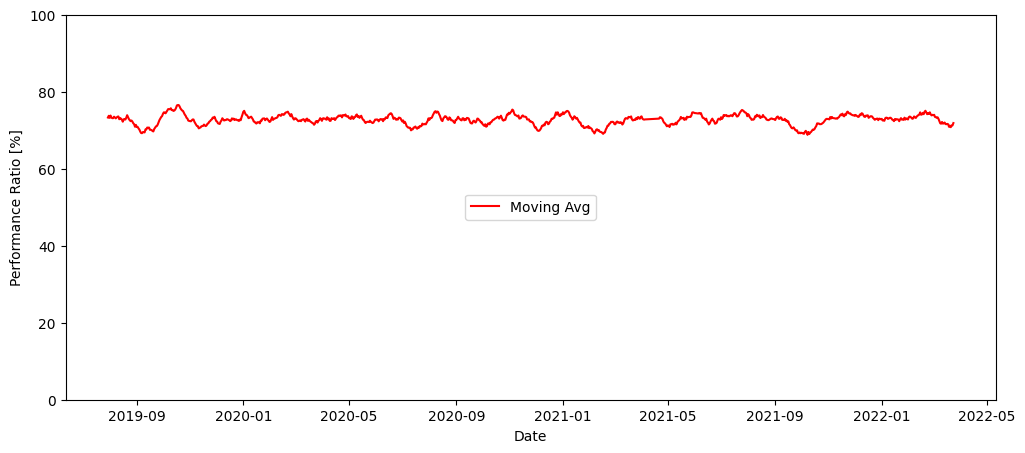

In [10]:
# Plot preparation
plt.figure(figsize = ( 12, 5))
ax = plt.axes()
ax.set_ylim(0, 100)

# plot using rolling average
sns.lineplot( x = 'Date',
             y = '30 day moving avg',
             data = df,
             color='red',
             linewidth=1.5,
             label = 'Moving Avg')

plt.legend(loc='center')
plt.xlabel('Date')
plt.ylabel('Performance Ratio [%]')

In [11]:
# Creating column for Target Budget Yield trend line
df['Target Budget Yield'] = 0.0

# Iteration through the rows to give first year the value of 73.9 and each corresponding year, value depreciates by 0.8 %
# Code works fine even when consecutive years are added

for index, row in df.iterrows():
    date = row['Date']
    year, month = date.year, date.month
    if pd.Timestamp(2019, 7, 1) <= date < pd.Timestamp(2020, 7, 1):
        df.loc[index, 'Target Budget Yield'] = 73.9
    elif month < 7:
        df.loc[index, 'Target Budget Yield'] = 73.9 * (0.992 ** (year - 2020))
    else:
        df.loc[index, 'Target Budget Yield'] = 73.9 * (0.992 ** (year - 2019))

In [12]:
df.head(5)

,Date,GHI,PR,30 day moving avg,Target Budget Yield
0,2019-07-01,3.256608,69.575676,NaN,73.9
1,2019-07-02,3.976767,79.314411,NaN,73.9
2,2019-07-03,2.811867,61.020006,NaN,73.9
3,2019-07-04,3.658408,83.262576,NaN,73.9
4,2019-07-05,5.590683,82.124440,NaN,73.9


Text(0, 0.5, 'Performance Ratio [%]')

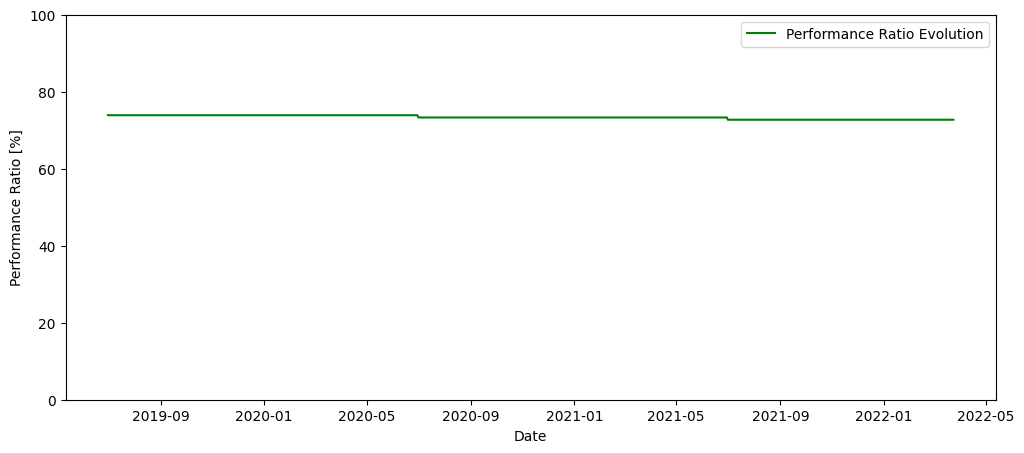

In [13]:
# Plot preparation
plt.figure(figsize = ( 12, 5))
ax = plt.axes()
ax.set_ylim(0, 100)

sns.lineplot( x = 'Date',
             y = 'Target Budget Yield',
             color = 'green',
             linewidth = 1.5,
             data = df,
             label = 'Performance Ratio Evolution')

plt.xlabel( 'Date')
plt.ylabel('Performance Ratio [%]')

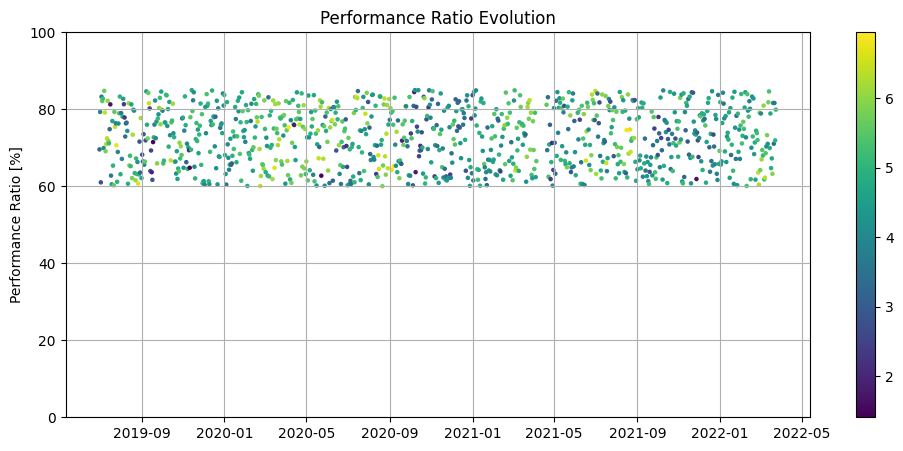

In [14]:
# Creating the scatter chart producing correlation between date and PR value in the point location.
# There is a gradient for colour with respect to corresponding GHI value.

x = np.array(df['Date'])
y = np.array(df['PR'])

# Plot Preparation
plt.figure(figsize = ( 12, 5))
ax = plt.axes()
ax.set_title("Performance Ratio Evolution")
ax.set_ylabel('Performance Ratio [%]')
ax.set_ylim(0, 100)

plt.scatter(x,y, c = df['GHI'], cmap = 'viridis', s = 5)

# Addition of grid and colorbar
plt.grid()
plt.colorbar()

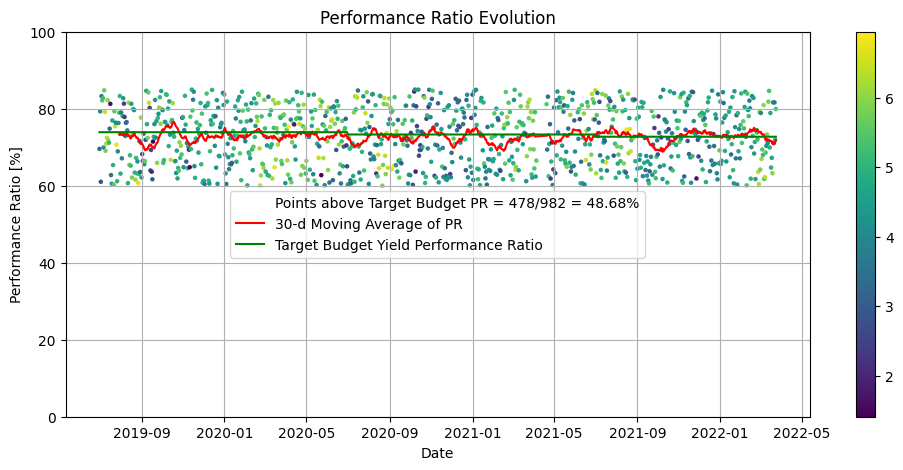

In [15]:
# Adding all three charts together in one plot
x = np.array(df['Date'])
y = np.array(df['PR'])

# To find number of points above target budget line
num = len(df[df['PR'] > df['Target Budget Yield']])
den = len(df)
ans = round(((num/den)*100),2)

# Plot Preparation
plt.figure(figsize = ( 12, 5))
ax = plt.axes()
ax.set_title("Performance Ratio Evolution")
ax.set_ylabel('Performance Ratio [%]')
ax.set_ylim(0, 100)

# Scatter plot
# Using matplotlib scatter plot
plt.scatter(x,y, c = df['GHI'], cmap = 'viridis', s = 5)

# Depicting percentage of points above target line in legend box
plt.plot([], [], ' ', label=f'Points above Target Budget PR = {num}/{den} = {ans}%')

# plot using rolling average
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = '30 day moving avg',
             data = df,
             color='red',
             linewidth=1.5,
             label = '30-d Moving Average of PR')

# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = 'Target Budget Yield',
             color = 'green',
             linewidth = 1.5,
             data = df,
             label = 'Target Budget Yield Performance Ratio')

plt.grid()
plt.colorbar()
plt.legend(loc='center')

In [16]:
# To find start and end date to input in Title of the plot
start_date_time = str(df['Date'].iloc[0].ctime())
end_date_time = str(df['Date'].iloc[-1].ctime())

start_date = start_date_time[4:10] + start_date_time[19:]
end_date = end_date_time[4:10] + end_date_time[19:]

print(start_date)
print(end_date)

Jul  1 2019
Mar 24 2022


In [17]:
# Average PR of last 7-d
avg_7 = round(df['PR'].tail(7).sum()/7,2)
print(avg_7)

# Average PR of last 30-d
avg_30 = round(df['PR'].tail(30).sum()/30,2)
print(avg_30)

# Average PR of last 60-d
avg_60 = round(df['PR'].tail(60).sum()/60,2)
print(avg_60)

# Average PR of last 90-d
avg_90 = round(df['PR'].tail(90).sum()/90,2)
print(avg_90)

# Average PR of last 365-d
avg_365 = round(df['PR'].tail(365).sum()/365,2)
print(avg_365)

# Average PR of lifetime
avg_life = round(df['PR'].sum()/len(df),2)
print(avg_life)

73.8
71.86
73.01
73.05
72.88
72.73


In [18]:
# Creating a string object to add as a text box in the plot with contents mentioned in the above cell
textstr = f'Average PR of last 7-d = {avg_7}\n Average PR of last 30-d = {avg_30}\n Average PR of last 60-d = {avg_60}\n Average PR of last 90-d = {avg_90}\n Average PR of last 365-d = {avg_365}\n Average PR of lifetime = {avg_life}'

In [19]:
# Library required to add textbox in matplotlib plots
from matplotlib.offsetbox import AnchoredText

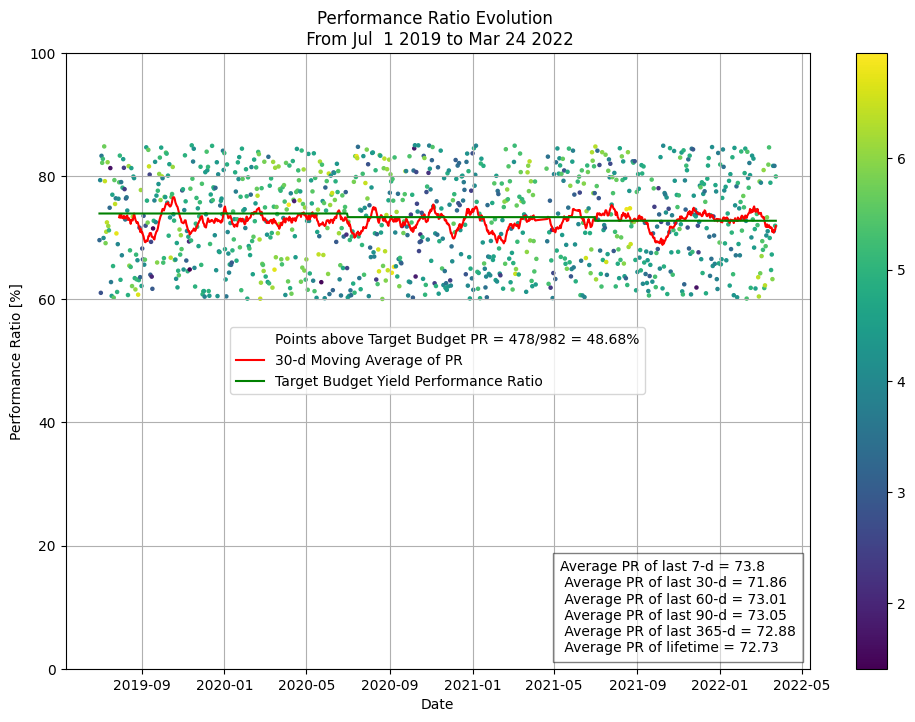

In [20]:
# Combined Charts

x = np.array(df['Date'])
y = np.array(df['PR'])

# To find number of points above target budget line
num = len(df[df['PR'] > df['Target Budget Yield']])
den = len(df)
ans = round(((num/den)*100),2)

# Plot Preparation
plt.figure(figsize = ( 12, 8))
ax = plt.axes()
ax.set_title(f"Performance Ratio Evolution \n From {start_date} to {end_date}") # Added start and end date to the title of chart
ax.set_ylabel('Performance Ratio [%]')
ax.set_ylim(0, 100)

# Scatter plot
# Using matplotlib scatter plot
plt.scatter(x,y, c = df['GHI'], cmap = 'viridis', s = 5)

# Depicting percentage of points above target line in legend box
plt.plot([], [], ' ', label=f'Points above Target Budget PR = {num}/{den} = {ans}%')

# plot using rolling average
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = '30 day moving avg',
             data = df,
             color='red',
             linewidth=1.5,
             label = '30-d Moving Average of PR')

# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = 'Target Budget Yield',
             color = 'green',
             linewidth = 1.5,
             data = df,
             label = 'Target Budget Yield Performance Ratio')

# place a text box in bottom right in axes coords
text_box = AnchoredText(textstr, frameon=True, loc=4, pad=0.5)
plt.setp(text_box.patch, facecolor='white', alpha=0.5)
ax.add_artist(text_box)

plt.grid()
plt.colorbar()
plt.legend(loc='center')

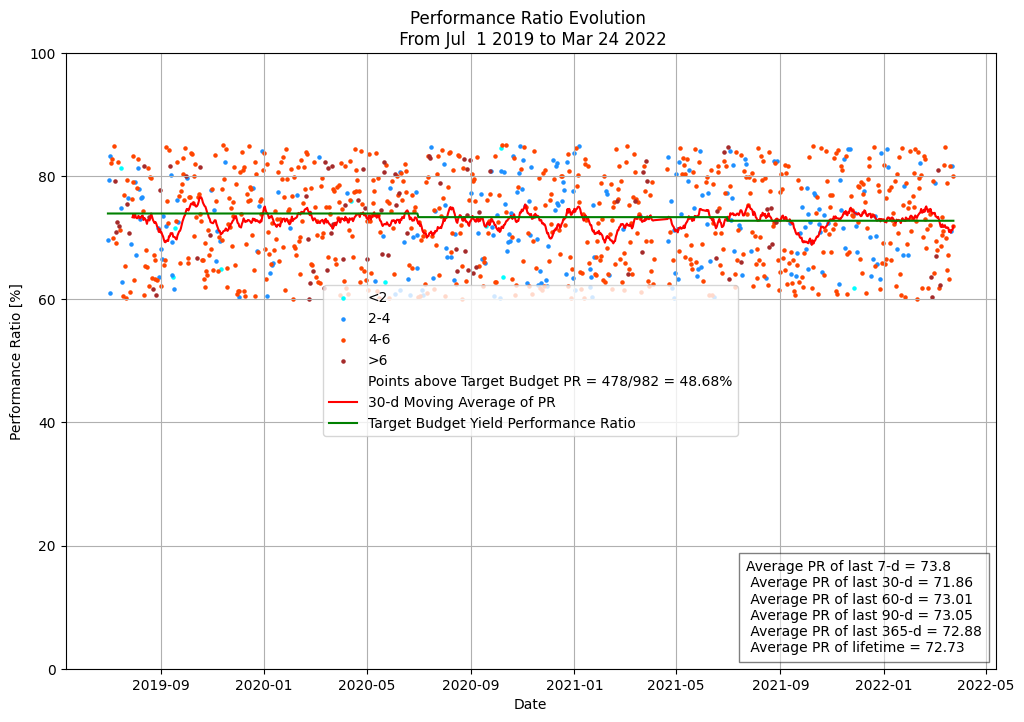

In [21]:
# Since we have colours pre-defined for scatter chart with respect to GHI values, We will plot scatter charts in another method for ease of code.

# Combined Charts

x = np.array(df['Date'])
y = np.array(df['PR'])

# To find number of points above target budget line
num = len(df[df['PR'] > df['Target Budget Yield']])
den = len(df)
ans = round(((num/den)*100),2)

# Plot Preparation
plt.figure(figsize = ( 12, 8))
ax = plt.axes()
ax.set_title(f"Performance Ratio Evolution \n From {start_date} to {end_date}") # Added start and end date to the title of chart
ax.set_ylabel('Performance Ratio [%]')
ax.set_ylim(0, 100)

plt.scatter(data=df[df.GHI < 2], x='Date', y='PR', c = 'cyan' , s = 5, label='<2')
plt.scatter(data=df[(df.GHI >= 2) & (df.GHI < 4)], x='Date', y='PR', c = 'dodgerblue' , s = 5, label='2-4')
plt.scatter(data=df[(df.GHI >= 4) & (df.GHI < 6)], x='Date', y='PR', c = 'orangered' , s = 5, label='4-6')
plt.scatter(data=df[df.GHI > 6], x='Date', y='PR', c = 'brown' , s = 5, label='>6')

# Depicting percentage of points above target line in legend box
plt.plot([], [], ' ', label=f'Points above Target Budget PR = {num}/{den} = {ans}%')

sns.lineplot( x = 'Date',
             y = '30 day moving avg',
             data = df,
             color='red',
             linewidth=1.5,
             label = '30-d Moving Average of PR')


sns.lineplot( x = 'Date',
             y = 'Target Budget Yield',
             color = 'green',
             linewidth = 1.5,
             data = df,
             label = 'Target Budget Yield Performance Ratio')

# place a text box in bottom right in axes coords
text_box = AnchoredText(textstr, frameon=True, loc=4, pad=0.5)
plt.setp(text_box.patch, facecolor='white', alpha=0.5)
ax.add_artist(text_box)

plt.grid()
plt.legend(loc='center')

In [ ]:
# As we can see, the legend of scatter plot gets merged with that of line plots.

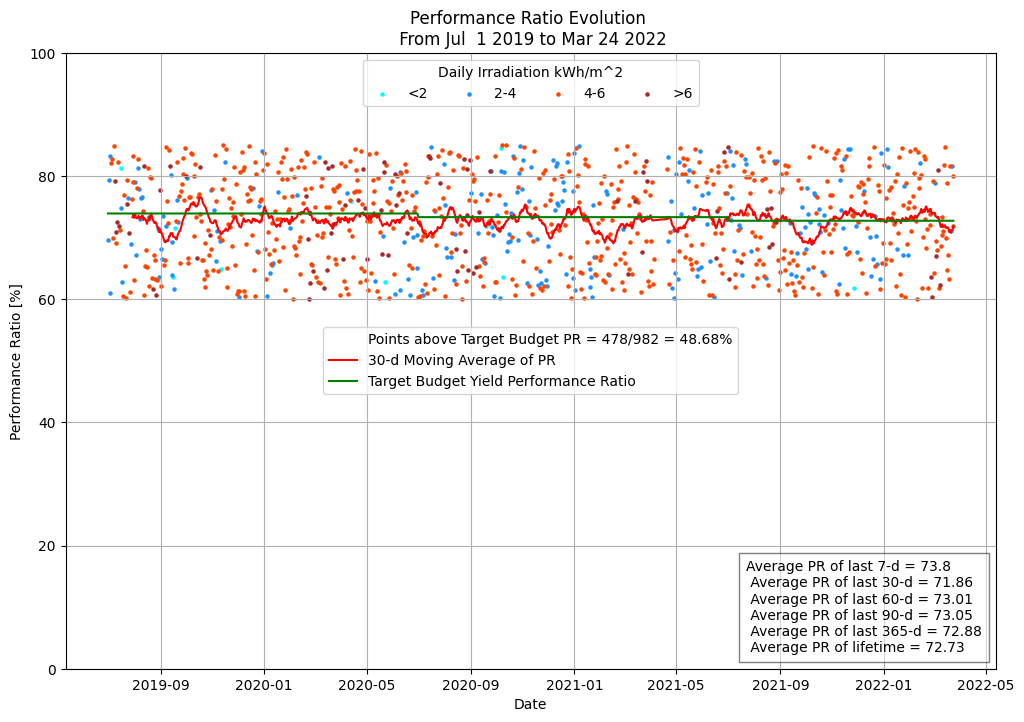

In [24]:
# Combined Charts

x = np.array(df['Date'])
y = np.array(df['PR'])

# To find number of points above target budget line
num = len(df[df['PR'] > df['Target Budget Yield']])
den = len(df)
ans = round(((num/den)*100),2)

# Plot Preparation
plt.figure(figsize = ( 12, 8))
ax = plt.axes()
ax.set_title(f"Performance Ratio Evolution \n From {start_date} to {end_date}") # Added start and end date to the title of chart
ax.set_ylabel('Performance Ratio [%]')
ax.set_ylim(0, 100)

plt.scatter(data=df[df.GHI < 2], x='Date', y='PR', c = 'cyan' , s = 5, label='<2')
plt.scatter(data=df[(df.GHI >= 2) & (df.GHI < 4)], x='Date', y='PR', c = 'dodgerblue' , s = 5, label='2-4')
plt.scatter(data=df[(df.GHI >= 4) & (df.GHI < 6)], x='Date', y='PR', c = 'orangered' , s = 5, label='4-6')
plt.scatter(data=df[df.GHI > 6], x='Date', y='PR', c = 'brown' , s = 5, label='>6')

# Depicting percentage of points above target line in legend box
plt.plot([], [], ' ', label=f'Points above Target Budget PR = {num}/{den} = {ans}%')

sns.lineplot( x = 'Date',
             y = '30 day moving avg',
             data = df,
             color='red',
             linewidth=1.5,
             label = '30-d Moving Average of PR')

sns.lineplot( x = 'Date',
             y = 'Target Budget Yield',
             color = 'green',
             linewidth = 1.5,
             data = df,
             label = 'Target Budget Yield Performance Ratio')

# place a text box in bottom right in axes coords
text_box = AnchoredText(textstr, frameon=True, loc=4, pad=0.5)
plt.setp(text_box.patch, facecolor='white', alpha=0.5)
ax.add_artist(text_box)

plt.grid()

h,l = plt.gca().get_legend_handles_labels() ## Get the legend handles and lables

l1 = plt.gca().legend(h[4:],l[4:], loc='center') ## Plot the seborn lines as the first legend
l2 = plt.gca().legend(h[:4],l[:4], loc='upper center', title='Daily Irradiation kWh/m^2', ncol = 4) ## Plot the scatter chart as the second legend

plt.gca().add_artist(l1) # Second legend erases the first, hence l1 is added again as an external artist
plt.show()